<a href="https://colab.research.google.com/github/MudSnail/Land_Cover_Classification/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import base libraries
import pandas as pd
import numpy as np
import copy
import pickle
import cloudpickle

#Sklearn - Pipelines, Training
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler

#Classification Models
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#Model metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_auc_score, precision_score, recall_score

#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#misc
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Connect to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Input Data, Combine and Subsample

In [3]:
#Read in CSVs
james_bay = pd.read_csv('/content/drive/MyDrive/james_bay_data.csv')
labrador = pd.read_csv('/content/drive/MyDrive/labrador_data.csv')
simcoe = pd.read_csv('/content/drive/MyDrive/simcoe_york_data.csv')

In [4]:
#List dataframes to add to james_bay
dfs = [labrador, simcoe]

#Merged data
merged_data = james_bay.append(dfs)

#Print shape and check new data
print(merged_data.shape)
merged_data.head()

(8917500, 13)


,B01,B06,B11,B07,B05,B03,B09,B12,B8A,B04,B08,B02,Class
0,0.0055,0.0017,0.0009,0.0016,0.0026,0.0056,0.0001,0.0009,0.0003,0.0032,0.0012,0.0114,0
1,0.0054,0.0020,0.0009,0.0017,0.0021,0.0060,0.0001,0.0005,0.0007,0.0028,0.0014,0.0115,0
2,0.0058,0.0018,0.0007,0.0016,0.0028,0.0060,0.0001,0.0008,0.0007,0.0030,0.0012,0.0124,0
3,0.0057,0.0016,0.0007,0.0016,0.0023,0.0058,0.0001,0.0012,0.0006,0.0031,0.0011,0.0119,0
4,0.0066,0.0013,0.0008,0.0020,0.0029,0.0059,0.0001,0.0008,0.0005,0.0030,0.0014,0.0115,0


In [5]:
#Drop Class = 0 (null values, which equate to 18)
merged_data = merged_data[merged_data.Class != 0]

#Double check value counts
merged_data.Class.value_counts()

15    2836714
18    1050988
1      677877
5      666952
16     646870
13     612009
8      575175
17     512930
12     415493
6      378274
2      151560
11     135890
14      94850
10      86338
19      74619
Name: Class, dtype: int64

In [7]:
#SubSample ~25 000 for each class
sample = merged_data.groupby('Class').apply(lambda x: x.sample(n=50000)).reset_index(drop=True)
sample.head(4)

,B01,B06,B11,B07,B05,B03,B09,B12,B8A,B04,B08,B02,Class
0,0.0189,0.1280,0.1049,0.1458,0.0647,0.0344,0.1672,0.0564,0.1584,0.0278,0.1518,0.0232,1
1,0.0142,0.1706,0.1606,0.1890,0.1041,0.0424,0.2082,0.0875,0.2103,0.0480,0.2038,0.0289,1
2,0.0097,0.1667,0.0926,0.1985,0.0617,0.0297,0.2241,0.0419,0.2311,0.0260,0.2199,0.0113,1
3,0.0156,0.1049,0.0724,0.1258,0.0441,0.0257,0.1979,0.0357,0.1406,0.0163,0.1408,0.0111,1


# EDA

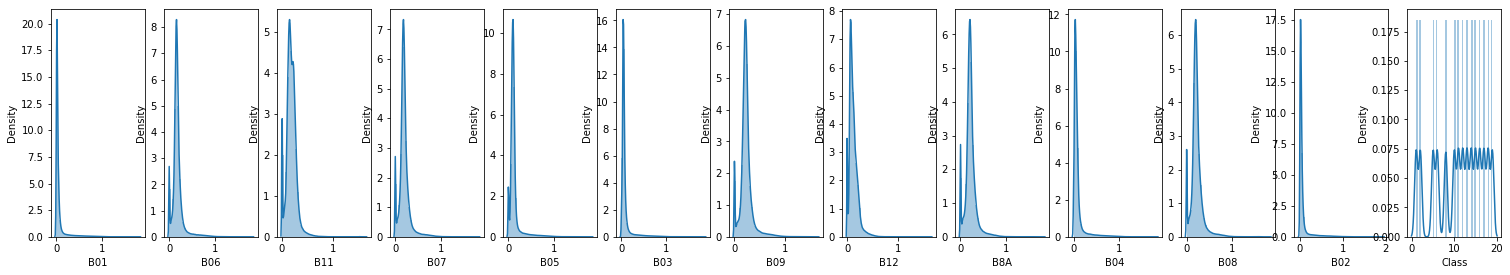

In [8]:
#Check distribution skewness

#exctract column values, identify number of columns and rows
l = sample.columns.values 
number_of_columns=13
number_of_rows = len(l)-1/number_of_columns

#plot figure for each column
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(sample[l[i]],kde=True) 

In [9]:
df = copy.deepcopy(sample)

def plot_class_distributions(x):
  selected_class = df.loc[df['Class'] == x]
  selected_class = selected_class.drop('Class', axis = 1)

  #Check distribution skewness

  #exctract column values, identify number of columns and rows
  l = selected_class.columns.values 
  number_of_columns=10
  number_of_rows = len(l)-1/number_of_columns

  #plot figure for each column
  plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
  for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(selected_class[l[i]],kde=True) 

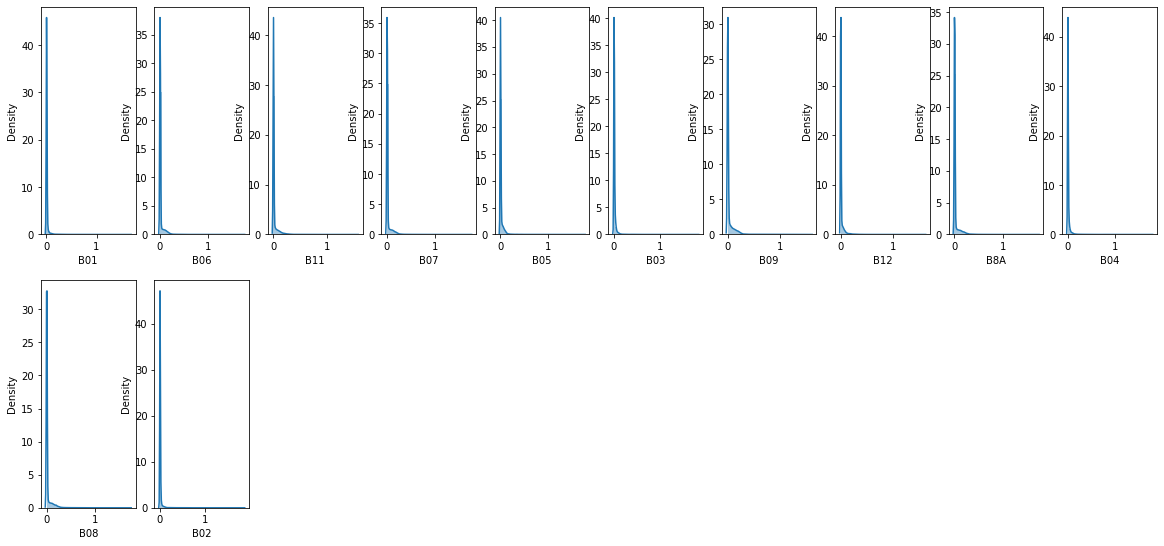

In [10]:
plot_class_distributions(18)